In [7]:
import numpy as np
from scipy.optimize import minimize, fsolve
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
def objective_func(V, params):
    params['V'] = np.hstack((V, params['Vtot']-np.sum(V)))
    c_out = cstrsolver(params)
    conversion = 1 - c_out/params['c0']
    obj = 1-conversion
    return obj

def cstrsolver(params):
    cinit = params['c0']*np.ones(params['V'].shape) #cinit = [C0 C0]
    cstat = fsolve(lambda c: cstrmodel(0,c,params), cinit)
    cout = cstat[-1]
    return cout

def cstrmodel(t, c, params):
    r = params['k']*c**params['n']
    Cin = np.hstack((params['c0'],c[:-1]))
    dcdt = params['q']/params['V']*(Cin-c)-r
    return dcdt

In [4]:
params = {
    'c0': 20,
    'Vtot': 20,
    'q': 0.03,
    'n': 2.4,
    'k': 0.0062,
    'Vguess': 10
}
sol = minimize(lambda V: objective_func(V,params), params['Vguess'], method='Nelder-Mead', options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.043584
         Iterations: 18
         Function evaluations: 36


C:\Users\fr8883ol-s\AppData\Local\Temp\ipykernel_10208\3364735881.py:15: RuntimeWarning: invalid value encountered in power
  r = params['k']*c**params['n']


C:\Users\fr8883ol-s\AppData\Local\Temp\ipykernel_10208\3364735881.py:17: RuntimeWarning: divide by zero encountered in divide
  dcdt = params['q']/params['V']*(Cin-c)-r
C:\Users\fr8883ol-s\AppData\Local\Temp\ipykernel_10208\3364735881.py:17: RuntimeWarning: invalid value encountered in multiply
  dcdt = params['q']/params['V']*(Cin-c)-r
C:\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\fr8883ol-s\AppData\Local\Temp\ipykernel_10208\3364735881.py:15: RuntimeWarning: invalid value encountered in power
  r = params['k']*c**params['n']
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


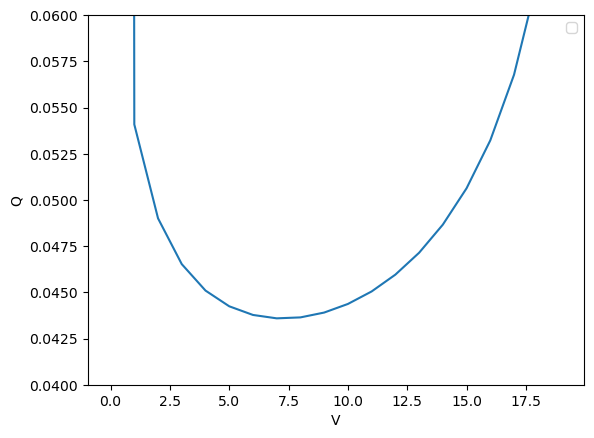

In [16]:
V_values = np.array([i for i in range(0,20,1)])

Q_values = np.array([objective_func(j,params) for j in V_values])

fig, ax = plt.subplots()

ax.plot(V_values, Q_values)
ax.set_xlabel('V')
ax.set_ylim(0.04,0.06)
ax.set_ylabel('Q')
ax.legend()